<font color= #28b463>

## ADCC Player & Match Data

<font color=  #3498db >
Project: predict match-level win/loss outcome at ADCC. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

<font color=  #3498db >

#### Load Fighter List

In [277]:
import pandas as pd
df2 = pd.read_excel('fighters_list.xlsx')
df2.head()

,Fighter
0,2017 Super Fight defending champion: Andre Gal...
1,2017 absolute champion: Felipe Pena
2,South American Trials Winner: Ruan Alvarenga (...
3,2nd European Trials Winner: Thomas Halpin (IRE)
4,Asia-Oceania Trials Winner: Kenta Iwamoto (JPN)


In [278]:
df_nul = df2["Fighter"].str.split(":", n = 1, expand = True)
df2["Entrance"]= df_nul[0]
df2["Name"]= df_nul[1]

In [279]:
df2.loc[df2['Entrance'].str.contains('Trials Winner'), 'Entrance_clean'] = 'Trials Medalists'
df2.loc[df2['Entrance'].str.contains('Invited'), 'Entrance_clean'] = 'Invited'
df2.loc[df2['Entrance'].str.contains('2017 champion'), 'Entrance_clean'] = '2017 Champion'
df2.loc[df2['Entrance'].str.contains('2017 absolute champion'), 'Entrance_clean'] = '2017 Champion'
df2.loc[df2['Entrance'].str.contains('2017 88kg champion'), 'Entrance_clean'] = '2017 Champion'
df2.loc[df2['Entrance'].str.contains('2017 Super Fight defending champion'), 'Entrance_clean'] = 'Super Fight Defending Champ'
df2['Name_2'] = df2['Name'].str.replace(r'\([^)]*\)', '')
df2['Name_2'].replace('\s+$', '', regex=True, inplace=True)
df2['Name_2'].replace('^\s+', '', regex=True, inplace=True)
df2.head()

,Fighter,Entrance,Name,Entrance_clean,Name_2
0,2017 Super Fight defending champion: Andre Gal...,2017 Super Fight defending champion,Andre Galvao,Super Fight Defending Champ,Andre Galvao
1,2017 absolute champion: Felipe Pena,2017 absolute champion,Felipe Pena,2017 Champion,Felipe Pena
2,South American Trials Winner: Ruan Alvarenga (...,South American Trials Winner,Ruan Alvarenga (BRA),Trials Medalists,Ruan Alvarenga
3,2nd European Trials Winner: Thomas Halpin (IRE),2nd European Trials Winner,Thomas Halpin (IRE),Trials Medalists,Thomas Halpin
4,Asia-Oceania Trials Winner: Kenta Iwamoto (JPN),Asia-Oceania Trials Winner,Kenta Iwamoto (JPN),Trials Medalists,Kenta Iwamoto


In [280]:
df2.shape

(98, 5)

In [6]:
df2.Entrance_clean.value_counts()

Invited                        58
Trials Medalists               32
2017 Champion                   7
Super Fight Defending Champ     1
Name: Entrance_clean, dtype: int64

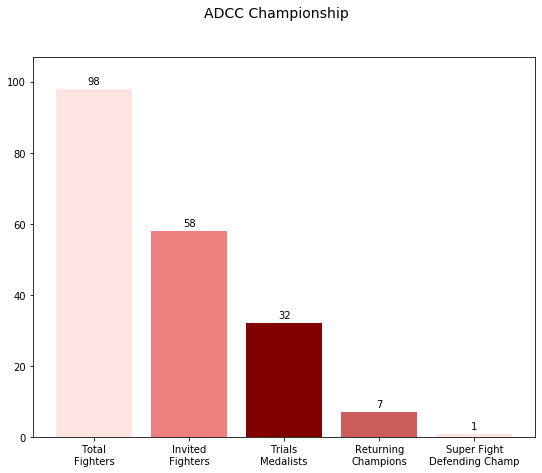

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(9,7))
x = np.arange(5)
fighters = [98, 58, 32, 7, 1]
my_colors = ['mistyrose','lightcoral','maroon','indianred','mistyrose']
rects1 = plt.bar(x, fighters, color=my_colors)
plt.xticks(x, ('Total\nFighters', 'Invited\nFighters', 'Trials\nMedalists', 'Returning\nChampions', 'Super Fight\nDefending Champ'))

ax.set_ylim((0, 107))
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.suptitle('ADCC Championship', fontsize=14)

plt.show()
fig.savefig('About ADCC Champ.png')

<font color=  #3498db >

#### Import Match Data

In [281]:
import pandas as pd
df = pd.read_csv('adcc_results.csv',
                parse_dates=['Time'])
df.Place.fillna('No Medal', inplace=True)
display(df.head())
display(df.tail())

,Gender,Weight,Championship,Round,Fighter,Points,Result,How,Time,Day,Match No,Place
0,Male,Men -66kg,Championship,Round of 16,Paulo Miyao,5,w,score,10:00,Saturday,33,No Medal
1,Male,Men -66kg,Championship,Round of 16,Kenta Iwamoto,0,l,score,10:00,Saturday,33,No Medal
2,Male,Men -66kg,Championship,Round of 16,Shane Jamil Hill-Taylor,0,l,score,10:00,Saturday,34,No Medal
3,Male,Men -66kg,Championship,Round of 16,Nicky Ryan,2,w,score,10:00,Saturday,34,No Medal
4,Male,Men -66kg,Championship,Round of 16,"Augusto ""Tanquinho"" Mendes",5,w,submission,7:55,Saturday,35,No Medal


,Gender,Weight,Championship,Round,Fighter,Points,Result,How,Time,Day,Match No,Place
221,Female,Women +60kg,Championship,Final,Carina Santi,0,l,submission,7:35,Sunday,95,Silver
222,Female,Women +60kg,Consolation,Consolation,Ana Carolina Vieira,0,l,score,10:00,Sunday,88,No Medal
223,Female,Women +60kg,Consolation,Consolation,Tayane Porfirio,5,w,score,10:00,Sunday,88,Bronze
224,Male,Super Fight,Super Fight,Super Fight,Andre Galvao,2,w,score,30,Sunday,113,Gold
225,Male,Super Fight,Super Fight,Super Fight,Felipe Pena,0,l,score,30,Sunday,113,Silver


In [282]:
# map entrance method to df
df_ent = df2[['Name_2','Entrance_clean']]
ent_dict = dict(zip(df_ent.Name_2, df_ent.Entrance_clean))
df['Entrance'] = df['Fighter'].map(ent_dict)

In [172]:
df['Entrance'].value_counts()

Invited                        139
Trials Medalists                52
2017 Champion                   29
Super Fight Defending Champ      1
Name: Entrance, dtype: int64

In [173]:
df.How.value_counts()

score           108
submission       70
ref decision     42
forfeit           6
Name: How, dtype: int64

In [11]:
df.How.value_counts(normalize=True)*100

score           47.787611
submission      30.973451
ref decision    18.584071
forfeit          2.654867
Name: How, dtype: float64

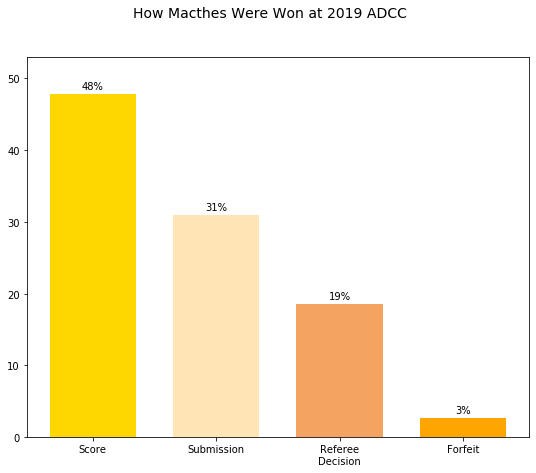

In [43]:
fig, ax = plt.subplots(figsize=(9,7))
x = np.arange(4)

my_colors = ['gold','moccasin','sandybrown','orange']

width = .7

how = df.How.value_counts(normalize=True)*100
rects1 = plt.bar(x, how, width=width,color=my_colors)
plt.xticks(x, ('Score', 'Submission', 'Referee\nDecision', 'Forfeit'))

ax.set_ylim((0, 53))
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width()/2, height,
#                     '%d' % round(height) + "%",
#                     ha='center', va='bottom')

        ax.annotate('%d' % round(height) + "%",
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
fig.suptitle('How Macthes Were Won at 2019 ADCC', fontsize=14)

plt.show()
fig.savefig('How Matches Were Won.png')

In [109]:
df.Fighter.value_counts()[:25]

Marcus Buchecha Almeida       8
Gordon Ryan                   8
Garry Tonon                   6
Kaynan Duarte                 5
Mahamed Aly                   5
Jon Blank                     5
Lachlan Giles                 5
Vinny Magalhaes               4
Patrick Gaudio                4
Augusto "Tanquinho" Mendes    4
Matheus Diniz                 4
Vagner Rocha                  4
Kennedy Maciel                4
Lucas "Hulk" Barbosa          4
Paulo Miyao                   4
Tye Ruotolo                   4
Craig Jones                   4
JT Torres                     4
Vinicius Gazola               4
Nick Rodriguez                4
Tim Spriggs                   4
Dante Leon                    4
Josh Hinger                   4
Roberto "Cyborg" Abreu        4
Ffion Davies                  3
Name: Fighter, dtype: int64

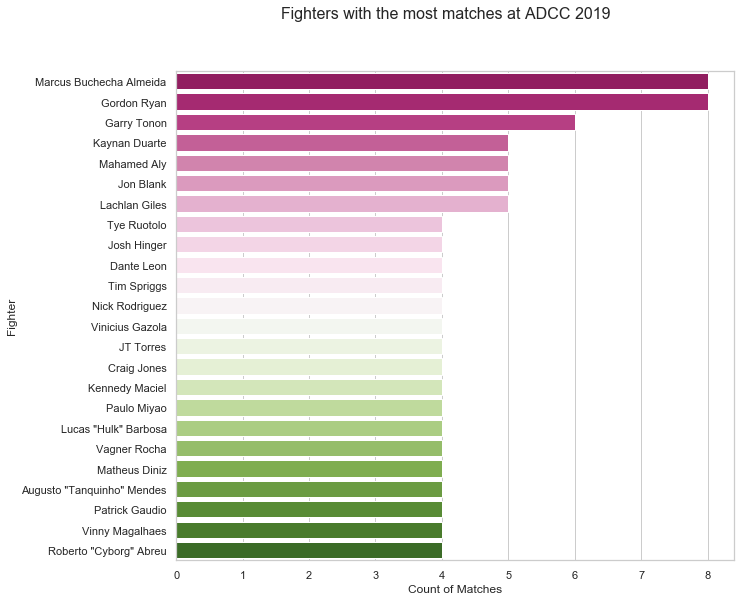

In [133]:
# plot number of matches by fighters

fighter = df["Fighter"].value_counts()[:24]
df_fighterCount = pd.DataFrame({'Fighter':fighter.index, 'Count of Matches':fighter.values}).sort_values("Count of Matches", ascending = False) #.head(20)
fig, ax = plt.subplots()
fig.suptitle("Fighters with the most matches at ADCC 2019",fontsize=16) 
fig.set_size_inches(10, 9)
ax = sns.barplot(x="Count of Matches", y="Fighter", data=df_fighterCount, palette="PiYG")
fig.savefig('Match Counts by Fighter.png',bbox_inches='tight')

In [74]:
Gender = (df.Gender.value_counts(normalize=True)*100).sort_index(ascending=False)

In [75]:
Weight = (df.Weight.value_counts(normalize=True)*100).sort_index(ascending=False)

In [82]:
Round = (df.Round.value_counts(normalize=True)*100).sort_values(ascending=False)

In [83]:
Points = (df.Points.value_counts(normalize=True)*100).sort_index()

In [84]:
Day = (df.Day.value_counts(normalize=True)*100).sort_index(ascending=False)

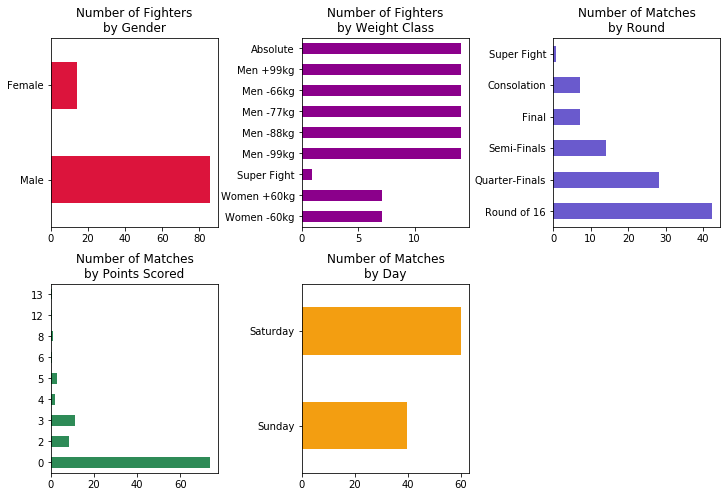

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(nrows=2, ncols=3,figsize=(12,8))
f.subplots_adjust(hspace=.3, wspace=.5)
        
rects1 =Gender.plot(ax=ax[0,0],color='crimson', kind='barh')
ax[0,0].set_title('Number of Fighters\nby Gender')
# ax[0,0].get_legend().remove()

rects2 =Weight.plot(ax=ax[0,1],color='darkmagenta', kind='barh')
ax[0,1].set_title('Number of Fighters\nby Weight Class')
# ax[0,1].get_legend().remove()

rects3 =Round.plot(ax=ax[0,2],color='slateblue', kind='barh')
ax[0,2].set_title('Number of Matches\nby Round')
# ax[0,2].get_legend().remove()

rects4 =Points.plot(ax=ax[1,0],color='seagreen', kind='barh')
ax[1,0].set_title('Number of Matches\nby Points Scored')
# ax[1,0].get_legend().remove()

rects5 =Day.plot(ax=ax[1,1],color='#f39e11', kind='barh')
ax[1,1].set_title('Number of Matches\nby Day')
# ax[1,1].get_legend().remove()

ax[1,2].remove()

plt.show()
f.savefig('Counts for Gender Weight Round Points Day.png')

<font color=  #3498db >

#### Import Competitor Data

In [283]:
import pandas as pd
df1 = pd.read_excel('competitor_data.xlsx',
                 parse_dates=['Birthdate', 'Belt_date'])
display(df1.head())
display(df1.tail())

,Name,Gym,Birthdate,Belt,Belt_date,Medal_ADCC,ADCC_place,Highest_ADCC_place,Max_medals,Year_1,MR_ADCC_Medal_yr,Years_competed,Num_ADCC_comp,Trails_winner,Year_2,Trails_place,Highest_Trials_place,Max_tr_medals,MR_tr_Medal_yr
0,Paulo Miyao,PSLPB Cicero Costha,1991-05-11,black,2013-06-01,3rd Place ADCC World Championship (2017),3,3.0,1.0,2017,2017.0,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
1,Kenta Iwamoto,Tri-Force Jiu Jitsu Academy,1997-01-01,purple,NaT,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
2,Shane Jamil Hill-Taylor,Team Lloyd Irvin,1995-12-08,black,2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
3,Nicky Ryan,Renzo Gracie Academy,2001-01-01,purple,NaT,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
4,"Augusto ""Tanquinho"" Mendes",Soul Fighters,1983-03-03,black,2004-12-01,3rd Place ADCC World Championship (2015),3,3.0,1.0,2015,2015.0,competed in 2011/2013/2015/2017/2019,5,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Gym,Birthdate,Belt,Belt_date,Medal_ADCC,ADCC_place,Highest_ADCC_place,Max_medals,Year_1,MR_ADCC_Medal_yr,Years_competed,Num_ADCC_comp,Trails_winner,Year_2,Trails_place,Highest_Trials_place,Max_tr_medals,MR_tr_Medal_yr
91,Ana Carolina Vieira,GF Team,1993-11-19,black,2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
92,Tayane Porfirio,Alliance,1994-12-11,black,2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
93,Jessica Flowers,Gracie Barra,1992-01-23,black,2016-12-01,"ADCC 2nd Place (2015),ADCC 3rd Place (2017)","2, 3",2.0,2.0,"2015, 2017",2017.0,"competed 2015, 2017, 2019",3,NaN,NaN,NaN,NaN,NaN,NaN
94,Nathiely de Jesus,Rodrigo Pinheiro,1996-02-10,black,2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
95,Carina Santi,G13,1989-12-01,black,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN


<font color=  #3498db >

Map competitor data to match data

In [90]:
df1.columns

Index(['Name', 'Gym', 'Birthdate', 'Belt', 'Belt_date', 'Medal_ADCC',
       'ADCC_place', 'Highest_ADCC_place', 'Max_medals', 'Year_1',
       'MR_ADCC_Medal_yr', 'Years_competed', 'Num_ADCC_comp', 'Trails_winner',
       'Year_2', 'Trails_place', 'Highest_Trials_place', 'Max_tr_medals',
       'MR_tr_Medal_yr'],
      dtype='object')

In [284]:
# map all the competitor data to match data in first dataframe
df_gym = df1[['Name','Gym']]
gym_dict = dict(zip(df_gym.Name, df_gym.Gym))
df['Gym'] = df['Fighter'].map(gym_dict)

df_map1 = df1[['Name','Birthdate']]
new_dict1 = dict(zip(df_map1.Name, df_map1.Birthdate))
df['Birthdate'] = df['Fighter'].map(new_dict1)

df_map2 = df1[['Name','Belt']]
new_dict2 = dict(zip(df_map2.Name, df_map2.Belt))
df['Belt'] = df['Fighter'].map(new_dict2)

df_map3 = df1[['Name','Belt_date']]
new_dict3 = dict(zip(df_map3.Name, df_map3.Belt_date))
df['Belt_date'] = df['Fighter'].map(new_dict3)

df_map4 = df1[['Name','Medal_ADCC']]
new_dict4 = dict(zip(df_map4.Name, df_map4.Medal_ADCC))
df['Medal_ADCC'] = df['Fighter'].map(new_dict4)

df_map5 = df1[['Name','ADCC_place']]
new_dict5 = dict(zip(df_map5.Name, df_map5.ADCC_place))
df['ADCC_place'] = df['Fighter'].map(new_dict5)

df_map6 = df1[['Name','Year_1']]
new_dict6 = dict(zip(df_map6.Name, df_map6.Year_1))
df['ADCC_Year'] = df['Fighter'].map(new_dict6)

df_map7 = df1[['Name','Years_competed']]
new_dict7 = dict(zip(df_map7.Name, df_map7.Years_competed))
df['ADCC_years_competed'] = df['Fighter'].map(new_dict7)

df_map8 = df1[['Name','Num_ADCC_comp']]
new_dict8 = dict(zip(df_map8.Name, df_map8.Num_ADCC_comp))
df['Num_ADCC_comp'] = df['Fighter'].map(new_dict8)

df_map9 = df1[['Name','Trails_winner']]
new_dict9 = dict(zip(df_map9.Name, df_map9.Trails_winner))
df['Trails_winner'] = df['Fighter'].map(new_dict9)

df_map10 = df1[['Name','Year_2']]
new_dict10 = dict(zip(df_map10.Name, df_map10.Year_2))
df['Trials_Year'] = df['Fighter'].map(new_dict10)

df_map11 = df1[['Name','Trails_place']]
new_dict11 = dict(zip(df_map11.Name, df_map11.Trails_place))
df['Trails_place'] = df['Fighter'].map(new_dict11)

df_map12 = df1[['Name','Highest_ADCC_place']]
new_dict12 = dict(zip(df_map12.Name, df_map12.Highest_ADCC_place))
df['Highest_ADCC_place'] = df['Fighter'].map(new_dict12)

df_map13 = df1[['Name','Max_medals']]
new_dict13 = dict(zip(df_map13.Name, df_map13.Max_medals))
df['Max_ADCC_medals'] = df['Fighter'].map(new_dict13)

df_map14 = df1[['Name','MR_ADCC_Medal_yr']]
new_dict14 = dict(zip(df_map14.Name, df_map14.MR_ADCC_Medal_yr))
df['MR_ADCC_Medal_yr'] = df['Fighter'].map(new_dict14)

df_map15 = df1[['Name','Highest_Trials_place']]
new_dict15 = dict(zip(df_map15.Name, df_map15.Highest_Trials_place))
df['Highest_Trials_place'] = df['Fighter'].map(new_dict15)

df_map16 = df1[['Name','Max_tr_medals']]
new_dict16 = dict(zip(df_map16.Name, df_map16.Max_tr_medals))
df['Max_tr_medals'] = df['Fighter'].map(new_dict16)

df_map17 = df1[['Name','MR_tr_Medal_yr']]
new_dict17 = dict(zip(df_map17.Name, df_map17.MR_tr_Medal_yr))
df['MR_tr_Medal_yr'] = df['Fighter'].map(new_dict17)

In [285]:
display(df1.head(3))
display(df1.tail(3))
df.shape

,Name,Gym,Birthdate,Belt,Belt_date,Medal_ADCC,ADCC_place,Highest_ADCC_place,Max_medals,Year_1,MR_ADCC_Medal_yr,Years_competed,Num_ADCC_comp,Trails_winner,Year_2,Trails_place,Highest_Trials_place,Max_tr_medals,MR_tr_Medal_yr
0,Paulo Miyao,PSLPB Cicero Costha,1991-05-11,black,2013-06-01,3rd Place ADCC World Championship (2017),3,3.0,1.0,2017,2017.0,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
1,Kenta Iwamoto,Tri-Force Jiu Jitsu Academy,1997-01-01,purple,NaT,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
2,Shane Jamil Hill-Taylor,Team Lloyd Irvin,1995-12-08,black,2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Gym,Birthdate,Belt,Belt_date,Medal_ADCC,ADCC_place,Highest_ADCC_place,Max_medals,Year_1,MR_ADCC_Medal_yr,Years_competed,Num_ADCC_comp,Trails_winner,Year_2,Trails_place,Highest_Trials_place,Max_tr_medals,MR_tr_Medal_yr
93,Jessica Flowers,Gracie Barra,1992-01-23,black,2016-12-01,"ADCC 2nd Place (2015),ADCC 3rd Place (2017)","2, 3",2.0,2.0,"2015, 2017",2017.0,"competed 2015, 2017, 2019",3,NaN,NaN,NaN,NaN,NaN,NaN
94,Nathiely de Jesus,Rodrigo Pinheiro,1996-02-10,black,2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN
95,Carina Santi,G13,1989-12-01,black,2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,competed 2019,1,NaN,NaN,NaN,NaN,NaN,NaN


(226, 31)

In [93]:
df.columns

Index(['Gender', 'Weight', 'Championship', 'Round', 'Fighter', 'Points',
       'Result', 'How', 'Time', 'Day', 'Match No', 'Place', 'Entrance', 'Min',
       'Sec', 'Seconds', 'Gym', 'Birthdate', 'Belt', 'Belt_date', 'Medal_ADCC',
       'ADCC_place', 'ADCC_Year', 'ADCC_years_competed', 'Num_ADCC_comp',
       'Trails_winner', 'Trials_Year', 'Trails_place', 'Highest_ADCC_place',
       'Max_ADCC_medals', 'MR_ADCC_Medal_yr', 'Highest_Trials_place',
       'Max_tr_medals', 'MR_tr_Medal_yr'],
      dtype='object')

In [94]:
print("Total Row Number: {0} \nTotal Col Number: {1}".format(df.shape[0], df.shape[1]))

Total Row Number: 226 
Total Col Number: 34


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 34 columns):
Gender                  226 non-null object
Weight                  226 non-null object
Championship            226 non-null object
Round                   226 non-null object
Fighter                 226 non-null object
Points                  226 non-null int64
Result                  226 non-null object
How                     226 non-null object
Time                    226 non-null object
Day                     226 non-null object
Match No                226 non-null int64
Place                   226 non-null object
Entrance                221 non-null object
Min                     226 non-null int32
Sec                     226 non-null int32
Seconds                 226 non-null float64
Gym                     224 non-null object
Birthdate               214 non-null datetime64[ns]
Belt                    224 non-null object
Belt_date               194 non-null datetime64[ns]
Me

In [97]:
nullvalues = df.loc[:, df.isnull().any()].isnull().sum().sort_values(ascending=False)
nullvalues

Max_ADCC_medals         165
Highest_ADCC_place      165
MR_ADCC_Medal_yr        160
ADCC_Year               160
ADCC_place              160
Medal_ADCC              160
Highest_Trials_place    138
Trails_place            138
Max_tr_medals           138
Trails_winner           133
MR_tr_Medal_yr          132
Trials_Year             132
Belt_date                32
Birthdate                12
Entrance                  5
Belt                      2
ADCC_years_competed       2
Gym                       2
Num_ADCC_comp             2
dtype: int64

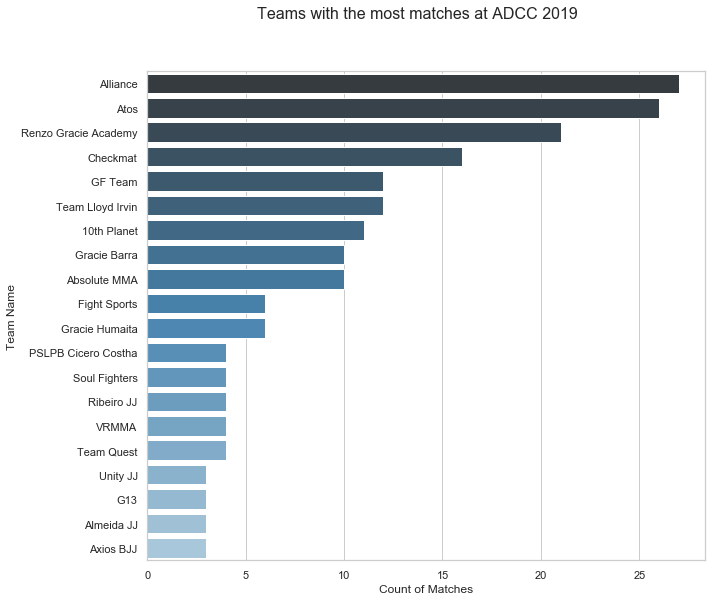

In [406]:
# plot number of fighters by gym - correlation

gym = df["Gym"].value_counts()
df_gymCount = pd.DataFrame({'Team Name':gym.index, 'Count of Matches':gym.values}).sort_values("Count of Matches", ascending = False).head(20)
fig, ax = plt.subplots()
fig.suptitle("Teams with the most matches at ADCC 2019",fontsize=16) 
fig.set_size_inches(10, 9)
ax = sns.barplot(x="Count of Matches", y="Team Name", data=df_gymCount, palette="Blues_d")
fig.savefig('Gym Counts by Matches.png',bbox_inches='tight')

Table of Medals by Team

In [469]:
p = {'No Medal': 99, 'Gold': 1, 'Silver': 2, 'Bronze': 3}
df['Place_num'] = df['Place'].map(p)

In [477]:
df.at[224,'Gym']='Atos'
df.at[225,'Gym']='Gracie Barra'

In [485]:
# export for table
gk = df[df.Place != 'No Medal']
gk2 = gk[['Place_num','Gym','Fighter','How','Weight']]
gk2.sort_values(['Place_num','Gym','Fighter'], ascending=[True,True,True])

,Place_num,Gym,Fighter,How,Weight
220,1,Alliance,Gabi Garcia,submission,Women +60kg
93,1,Alliance,Matheus Diniz,score,Men -88kg
205,1,Almeida JJ,Bianca Basilio,submission,Women -60kg
224,1,Atos,Andre Galvao,score,Super Fight
60,1,Atos,JT Torres,submission,Men -77kg
156,1,Atos,Kaynan Duarte,score,Men +99kg
124,1,Renzo Gracie Academy,Gordon Ryan,submission,Men -99kg
188,1,Renzo Gracie Academy,Gordon Ryan,score,Absolute
28,1,Soul Fighters,"Augusto ""Tanquinho"" Mendes",score,Men -66kg
92,2,Absolute MMA,Craig Jones,score,Men -88kg


In [452]:
gk = df[df.Place != 'No Medal']
gkk = gk.groupby(['Place', 'Gym'])
gkk.first()

Gender       Weight  Championship        Round  \
Place  Gym                                                                    
Bronze 10th Planet           Female  Women -60kg   Consolation  Consolation   
       Absolute MMA            Male     Absolute   Consolation  Consolation   
       Alliance              Female  Women +60kg   Consolation  Consolation   
       Atos                    Male    Men -88kg   Consolation  Consolation   
       Checkmat                Male    Men +99kg   Consolation  Consolation   
       PSLPB Cicero Costha     Male    Men -66kg  Championship  Semi-Finals   
       Renzo Gracie Academy    Male    Men -77kg   Consolation  Consolation   
Gold   Alliance                Male    Men -88kg  Championship        Final   
       Almeida JJ            Female  Women -60kg  Championship        Final   
       Atos                    Male    Men -77kg  Championship        Final   
       Renzo Gracie Academy    Male    Men -99kg  Championship        Final   
       Soul Fighters           Male    Men -66kg  Championship        Final   
Silver Absolute MMA            Male    Men -88kg  Championship        Final   
       Alliance                Male    Men -66kg  Championship        Final   
       Checkmat                Male     Absolute  Championship        Final   
       East Coast BJJ        Female  Women -60kg  Championship        Final   
       G13                   Female  Women +60kg  Championship        Final   
       Renzo Gracie Academy    Male    Men +99kg  Championship        Final   
       VRMMA                   Male    Men -77kg  Championship        Final   

                                                Fighter  Points Result  \
Place  Gym                                                               
Bronze 10th Planet                     Elvira Karppinen       0      w   
       Absolute MMA                       Lachlan Giles       0      w   
       Alliance                         Tayane Porfirio       5      w   
       Atos                                 Josh Hinger       3      w   
       Checkmat                 Marcus Buchecha Almeida       0      w   
       PSLPB Cicero Costha                  Paulo Miyao       0      l   
       Renzo Gracie Academy                 Garry Tonon       0      w   
Gold   Alliance                           Matheus Diniz       2      w   
       Almeida JJ                        Bianca Basilio       0      w   
       Atos                                   JT Torres       3      w   
       Renzo Gracie Academy                 Gordon Ryan       0      w   
       Soul Fighters         Augusto "Tanquinho" Mendes       3      w   
Silver Absolute MMA                         Craig Jones       0      l   
       Alliance                          Kennedy Maciel       0      l   
       Checkmat                 Marcus Buchecha Almeida       0      l   
       East Coast BJJ                      Ffion Davies       0      l   
       G13                                 Carina Santi       0      l   
       Renzo Gracie Academy              Nick Rodriguez       0      l   
       VRMMA                               Vagner Rocha       0      l   

                                      How   Time     Day  ...  RoundNo Min  \
Place  Gym                                                ...                
Bronze 10th Planet                forfeit   0:00  Sunday  ...        5   0   
       Absolute MMA            submission   7:12  Sunday  ...        5   7   
       Alliance                     score  10:00  Sunday  ...        5  10   
       Atos                         score  10:00  Sunday  ...        5  10   
       Checkmat                   forfeit   0:00  Sunday  ...        5   0   
       PSLPB Cicero Costha   ref decision  15:00  Sunday  ...        3  15   
       Renzo Gracie Academy    submission   5:22  Sunday  ...        5   5   
Gold   Alliance                     score     30  Sunday  ...        4  30   
       Almeida JJ              sub

<font color=  #3498db >
Convert Birthdate and Belt_date to DateTime

In [286]:
import datetime
from datetime import time
# df['Time'] = pd.to_datetime(df['Time'], format= '%M:%S')
df['Birthdate'] = pd.to_datetime(df['Birthdate'])
df['Belt_date'] = pd.to_datetime(df['Belt_date'])
df['MR_ADCC_Medal_yr'] = pd.to_datetime(df['MR_ADCC_Medal_yr'])
df['MR_tr_Medal_yr'] = pd.to_datetime(df['MR_tr_Medal_yr'])

In [287]:
df['Birthdate'].dtype

dtype('<M8[ns]')

In [288]:
datetime.datetime.now()

datetime.datetime(2019, 10, 26, 23, 35, 39, 604323)

In [289]:
import numpy as np
df['age_float'] = (datetime.datetime.now() - df['Birthdate'])/np.timedelta64(1, 'Y')

In [290]:
df['blackbelt_float'] = (datetime.datetime.now() - df['Belt_date'])/np.timedelta64(1, 'Y')

In [291]:
df.head()

,Gender,Weight,Championship,Round,Fighter,Points,Result,How,Time,Day,...,Trials_Year,Trails_place,Highest_ADCC_place,Max_ADCC_medals,MR_ADCC_Medal_yr,Highest_Trials_place,Max_tr_medals,MR_tr_Medal_yr,age_float,blackbelt_float
0,Male,Men -66kg,Championship,Round of 16,Paulo Miyao,5,w,score,10:00,Saturday,...,NaN,NaN,3.0,1.0,1970-01-01 00:00:00.000002017,NaN,NaN,NaT,28.463235,6.403918
1,Male,Men -66kg,Championship,Round of 16,Kenta Iwamoto,0,l,score,10:00,Saturday,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,22.817671,NaN
2,Male,Men -66kg,Championship,Round of 16,Shane Jamil Hill-Taylor,0,l,score,10:00,Saturday,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,23.885454,3.403172
3,Male,Men -66kg,Championship,Round of 16,Nicky Ryan,2,w,score,10:00,Saturday,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,18.817589,NaN
4,Male,Men -66kg,Championship,Round of 16,"Augusto ""Tanquinho"" Mendes",5,w,submission,7:55,Saturday,...,NaN,NaN,3.0,1.0,1970-01-01 00:00:00.000002015,NaN,NaN,NaT,36.652315,14.902382


In [292]:
df.age_float.isnull().sum()

12

In [293]:
#fill in birthdate NaNs with the median age
df['age_float'].fillna((df['age_float'].median()), inplace=True)

In [294]:
df.age_float.isnull().sum()

0

In [295]:
df.blackbelt_float.isnull().sum()

32

In [296]:
#what to do with missing black belt dates? no dates indicates not a bb yet - fill with 0 since there isn't time as bb
#fill in birthdate NaNs with the median age
df['blackbelt_float'].fillna(value=0, inplace=True)

In [297]:
df.blackbelt_float.isnull().sum()

0

In [298]:
df.age_float.value_counts().sort_index()

16.818916    4
18.817589    2
21.150285    4
21.755363    5
22.349489    4
            ..
37.391550    4
37.416191    4
37.818663    2
38.850854    4
39.305347    1
Name: age_float, Length: 83, dtype: int64

In [206]:
df.blackbelt_float.value_counts()

 0.000000     32
 1.404263     11
 3.402935     10
 2.901898     10
 14.902145     8
 3.734222      8
 9.404428      8
 2.403599      8
 6.901981      7
 4.572022      7
 6.403681      6
 6.151794      6
 14.403846     5
 0.903226      5
 4.153122      5
 5.404345      5
 5.237333      4
 11.904137     4
-0.112537      4
 5.817769      4
 2.069575      4
 10.817188     4
 4.322872      4
 1.152376      4
 0.489802      3
 4.903308      3
 0.571940      3
 0.985363      3
 9.817851      3
 8.656979      3
 15.488057     2
 4.489884      2
 15.904219     2
 8.071067      2
 4.070985      2
 3.068911      2
 12.903473     2
 3.903972      2
 0.404927      2
 7.151130      2
 7.904054      2
 1.902562      2
 3.819097      1
 6.069657      1
 0.038048      1
 2.321462      1
 4.985446      1
 13.237497     1
 12.818598     1
 6.321544      1
 14.817270     1
 4.405009      1
 4.818433      1
Name: blackbelt_float, dtype: int64

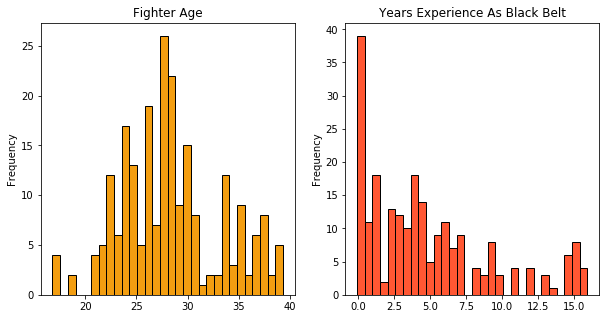

In [209]:
# calculate age and year as black belt
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(1,2,figsize=(10,5))
df.age_float.plot.hist(ax=ax[0],bins=30,edgecolor='black',color='#f39e11',)

ax[0].set_title('Fighter Age')

df.blackbelt_float.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='#FF5733')

ax[1].set_title('Years Experience As Black Belt')

plt.show()
f.savefig('Fighter Age and BB Experience.png')

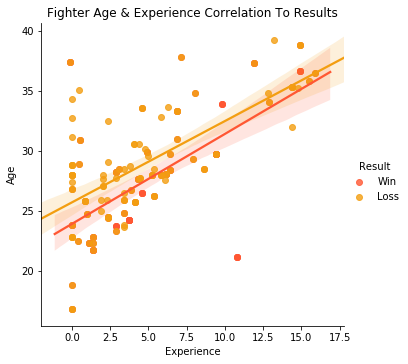

In [66]:
pal = ['#FF5733','#f39e11']
n = sns.lmplot(x="blackbelt_float", y="age_float", hue="Results", data=df,palette=pal,fit_reg=True)
ax = plt.gca()
ax.set_xlabel("Experience") 
ax.set_ylabel("Age") 
ax.set_title("Fighter Age & Experience Correlation To Results") 
n.savefig('Scatter - Fighter Age and BB Experience.png')

In [299]:
s = {'w': 'Win', 'l': 'Loss'}
df['Results'] = df['Result'].map(s)

In [195]:
NumADCCCount = df.groupby('Results')['Num_ADCC_comp'].value_counts().unstack().fillna(0)

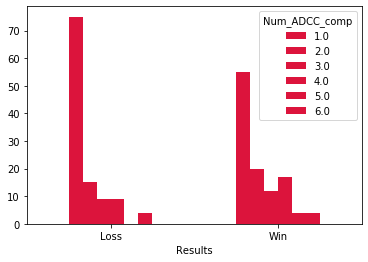

In [196]:
NumADCCCount.plot(color='crimson', kind='bar',rot=0)

In [197]:
TrialsPlaceCount = df.groupby('Results')['Highest_Trials_place'].value_counts().unstack().fillna(0)

In [198]:
TrialsMedalCount = df.groupby('Results')['Max_tr_medals'].value_counts().unstack().fillna(0)

In [199]:
ADCCPlaceCount = df.groupby('Results')['Highest_ADCC_place'].value_counts().unstack().fillna(0)

In [200]:
ADCCMedalCount = df.groupby('Results')['Max_ADCC_medals'].value_counts().unstack().fillna(0)

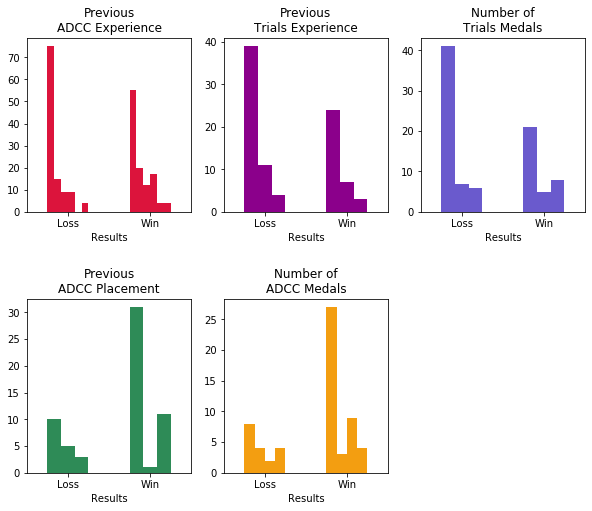

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(nrows=2, ncols=3,figsize=(10,8))
f.subplots_adjust(hspace=.5)
        
rects1 =NumADCCCount.plot(ax=ax[0,0],color='crimson', kind='bar',rot=0)
ax[0,0].set_title('Previous\nADCC Experience')
ax[0,0].get_legend().remove()

rects2 =TrialsPlaceCount.plot(ax=ax[0,1],color='darkmagenta', kind='bar',rot=0)
ax[0,1].set_title('Previous\nTrials Experience')
ax[0,1].get_legend().remove()

rects3 =TrialsMedalCount.plot(ax=ax[0,2],color='slateblue', kind='bar',rot=0)
ax[0,2].set_title('Number of\nTrials Medals')
ax[0,2].get_legend().remove()

rects4 =ADCCPlaceCount.plot(ax=ax[1,0],color='seagreen', kind='bar',rot=0)
ax[1,0].set_title('Previous\nADCC Placement')
ax[1,0].get_legend().remove()

rects5 =ADCCMedalCount.plot(ax=ax[1,1],color='#f39e11', kind='bar',rot=0)
ax[1,1].set_title('Number of\nADCC Medals')
ax[1,1].get_legend().remove()

ax[1,2].remove()

plt.show()
f.savefig('ADCC Experience Plots by W-L-Updated 1.png')

<font color=  #3498db >

#### Assign Numercial Values to Categorical Data

In [301]:
df.Round.value_counts()

Round of 16       96
Quarter-Finals    64
Semi-Finals       32
Consolation       16
Final             16
Super Fight        2
Name: Round, dtype: int64

In [302]:
r = {'Round of 16': 1, 'Quarter-Finals': 2, 'Semi-Finals': 3, 'Final': 4, 'Consolation': 5, 'Super Fight': 6}
df['RoundNo'] = df['Round'].map(r)

In [303]:
df.RoundNo.value_counts()

1    96
2    64
3    32
5    16
4    16
6     2
Name: RoundNo, dtype: int64

In [535]:
df.Time.value_counts()[:10]

10:00    68
15:00    68
30        6
0:00      6
20:00     4
7:12      4
9:17      4
2:43      2
13:11     2
6:32      2
Name: Time, dtype: int64

In [305]:
df.Time.dtypes

dtype('O')

In [306]:
df_min = df["Time"].str.split(":", n = 1, expand = True)
df['Min'] = df_min[0]
df['Sec'] = df_min[1]

In [307]:
df['Min']=df['Min'].astype(int)

In [308]:
df['Sec'].isnull().sum()

6

In [309]:
df['Sec'].fillna(0, inplace=True)

In [310]:
df['Sec']=df['Sec'].astype(int)

In [311]:
df['Seconds'] = (df['Min'] * 60 + df['Sec'])/60

In [536]:
df.Seconds.value_counts()[:10]

10.0    68
Name: Seconds, dtype: int64

In [313]:
df.Weight.value_counts()

Men -66kg      32
Men -77kg      32
Absolute       32
Men +99kg      32
Men -99kg      32
Men -88kg      32
Women +60kg    16
Women -60kg    16
Super Fight     2
Name: Weight, dtype: int64

In [314]:
w = {'Men -66kg': 66, 'Men +99kg': 150, 'Men -99kg': 99, 'Men -88kg': 88, 'Men -77kg': 77, 'Absolute': 200,
    'Women -60kg': 60, 'Women +60kg': 120, 'Super Fight': 200}
df['KGWeight'] = df['Weight'].map(w)

In [315]:
df.KGWeight.value_counts()

200    34
150    32
99     32
88     32
77     32
66     32
120    16
60     16
Name: KGWeight, dtype: int64

In [316]:
df.How.value_counts()

score           108
submission       70
ref decision     42
forfeit           6
Name: How, dtype: int64

In [317]:
h = {'submission': 100, 'score': 75, 'ref decision': 25, 'forfeit': 0}
df['How_weighted'] = df['How'].map(h)

In [318]:
df.How_weighted.value_counts()

75     108
100     70
25      42
0        6
Name: How_weighted, dtype: int64

In [488]:
h = {'submission': 3, 'score': 2, 'ref decision': 1, 'forfeit': 0}
df['How_weighted_2'] = df['How'].map(h)

In [489]:
df.How_weighted_2=df.How_weighted_2.astype(int)

In [490]:
df.How_weighted_2.value_counts()

2    108
3     70
1     42
0      6
Name: How_weighted_2, dtype: int64

In [322]:
df.Result.value_counts()

l    113
w    113
Name: Result, dtype: int64

In [323]:
m = {'w': 1, 'l': -1}
df['Result_score'] = df['Result'].map(m)

In [324]:
df.Result_score.value_counts()

 1    113
-1    113
Name: Result_score, dtype: int64

In [325]:
df['Final_WL_Score'] = df['How_weighted']*df['Result_score']

In [326]:
df.Final_WL_Score.value_counts()

 75     54
-75     54
 100    35
-100    35
 25     21
-25     21
 0       6
Name: Final_WL_Score, dtype: int64

Final score determined by how a match was won, multiplied by a win vs loss. Here is the scoring:
- Submission is awarded 100 points
- Score 75
- Referees decision 25
- Forfiet 0

Wins are multiplied by 1 and losses are multiplied by -1. The boxplots shows the spread of how matches ended. JT Torres, for example, won all his matches by score or submission, this his spread is between the score of 75 and 100. Garry Tonon has two submission, so two dots on the 100 mark, and two losses, one by score and the other by submission. So he spans the full range.

In [327]:
p = {'No Medal': 0, 'Gold': 100, 'Silver': 50, 'Bronze': 25}
df['Place_score'] = df['Place'].map(p)

In [328]:
df.Place_score.value_counts()

0      200
100      9
50       9
25       8
Name: Place_score, dtype: int64

In [329]:
df.shape

(226, 44)

Time Plots

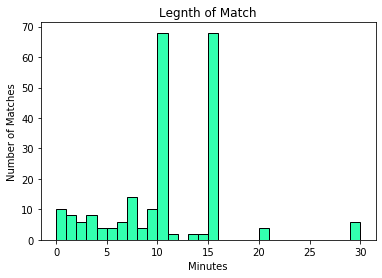

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df.Seconds.plot.hist(bins=30,edgecolor='black',color='#33ffaf')

ax.set_xlabel("Minutes") 
ax.set_ylabel("Number of Matches") 
ax.set_title('Legnth of Match')

plt.show()
fig.savefig('Legnth of Matches 2.png')

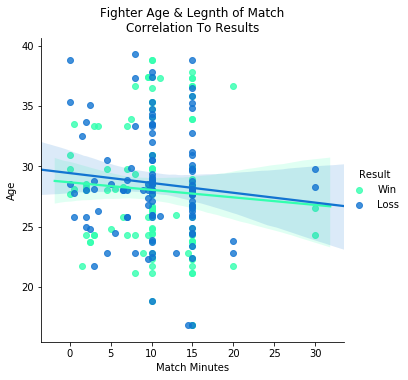

In [75]:
# minutes and points correlation 

pal = ['#33ffaf','#1274d1']
m = sns.lmplot(x="Minutes", y="age_float", hue="Results", data=df,palette=pal,fit_reg=True)
ax = plt.gca()
ax.set_xlabel("Match Minutes") 
ax.set_ylabel("Age") 
ax.set_title("Fighter Age & Legnth of Match\nCorrelation To Results") 
m.savefig('Scatter - Fighter Age and Match Time.png')

Minutes by Round Number

In [240]:
df.RoundNo.value_counts()

1    96
2    64
3    32
5    16
4    16
6     2
Name: RoundNo, dtype: int64

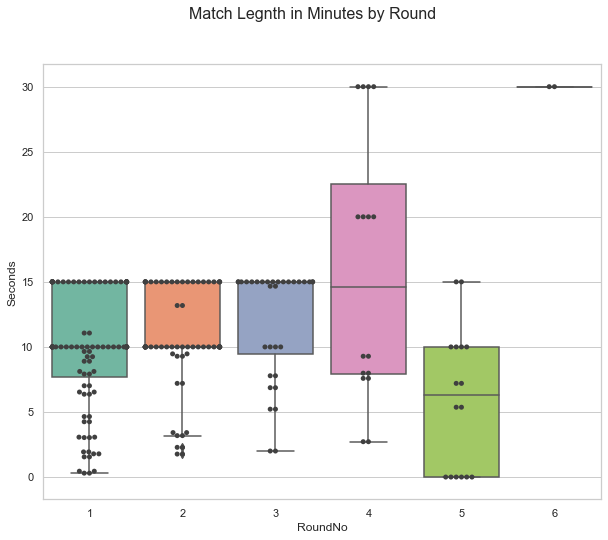

In [247]:
#plot legnth of match by round - loger as time goes on

fig, ax = plt.subplots()
fig.suptitle("Match Legnth in Minutes by Round",fontsize=16) 
fig.set_size_inches(10, 8)

# plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
# ax.set_title("Match Legnth in Minutes by Round") 
ax = sns.boxplot(x="RoundNo", y="Seconds", data=df,palette="Set2",)
ax = sns.swarmplot(x="RoundNo", y="Seconds", data=df, color=".25",)
plt.savefig('Round by Time.png')

How Match Was Won by Weight Class

In [487]:
df.How_weighted_2.value_counts()

3    108
4     70
1     42
0      6
Name: How_weighted_2, dtype: int64

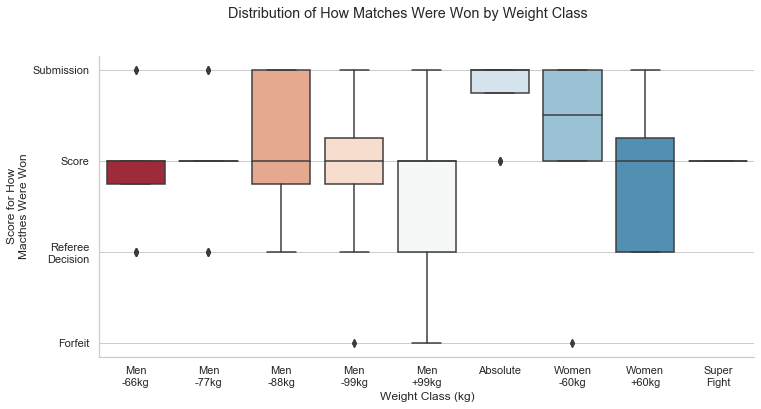

In [492]:
# g.sns.set_pallette("RdBu")
g = sns.catplot(x="Weight", y="How_weighted_2",data=df, kind="box",palette="RdBu",height=5, aspect=2)
# g = sns.swarmplot(x="Weight", y="How_weighted", data=df, color=".25",)
g.fig.suptitle("Distribution of How Matches Were Won by Weight Class",y=1.1) 
g.set(xlabel="Weight Class (kg)", ylabel="Score for How\nMacthes Were Won")

xlabels = ['Men\n-66kg','Men\n-77kg','Men\n-88kg','Men\n-99kg','Men\n+99kg',
          'Absolute','Women\n-60kg','Women\n+60kg','Super\nFight']
g.set_xticklabels(xlabels)
 
g.set(yticks=range(0, 4))

ylabels = ['Forfeit','Referee\nDecision','Score','Submission']
g.set_yticklabels(ylabels)

g.savefig('Weight by How Won 2.png',bbox_inches='tight')

Final Score by Fighter

In [370]:
df.shape

(226, 44)

In [371]:
df3 = df[['Round','Result','Day','Gender','RoundNo','Fighter','Final_WL_Score']]

In [372]:
df3.shape

(226, 7)

In [388]:
m_list = df3[df3['Fighter'].isin(['Paulo Miyao', 'Augusto "Tanquinho" Mendes','Tye Ruotolo','Kennedy Maciel',
                                 'JT Torres','Garry Tonon','Dante Leon','Vagner Rocha','Craig Jones','Jon Blank',
                                 'Josh Hinger','Matheus Diniz','Gordon Ryan','Lucas "Hulk" Barbosa','Vinicius Gazola',
                                 'Vinny Magalhaes','Marcus Buchecha Almeida','Kaynan Duarte','Nick Rodriguez',
                                 'Roberto "Cyborg" Abreu','Mahamed Aly','Lachlan Giles','Tim Spriggs','Patrick Gaudio'])]

In [379]:
m_list.shape

(110, 7)

In [389]:
f_list = df3[df3['Fighter'].isin(['Beatriz Mesquita', 'Ffion Davies','Bianca Basilio','Elvira Karppinen',
                                 'Gabi Garcia','Ana Carolina Vieira','Tayane Porfirio','Carina Santi'])]

In [382]:
f_list.shape

(24, 7)

In [375]:
male = df3[df3['Gender'] == 'Male'] #remove the first two round, on saturday
female = df3[df3['Gender'] == 'Female']

In [376]:
female.shape

(32, 7)

In [377]:
male.shape

(194, 7)

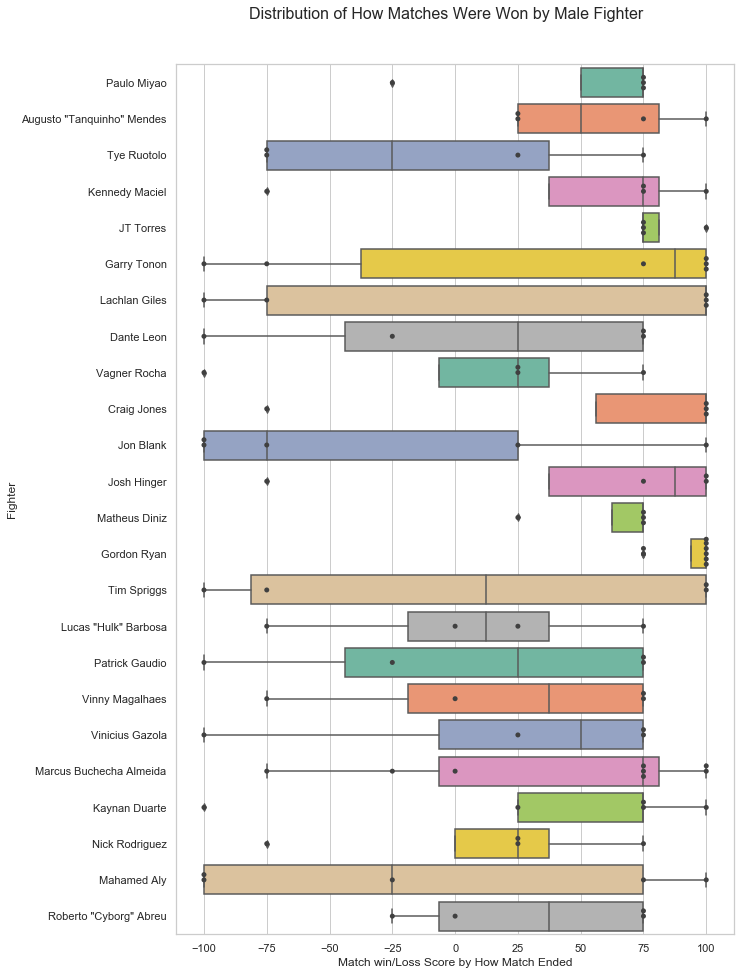

In [402]:
# fighter by score - Final_W-L_Score
fig, ax3 = plt.subplots()
# fig.suptitle("Match Legnth in Minutes by Round",fontsize=16) 
fig.set_size_inches(10, 16)

# plt.figure(figsize=(10,16))
ax3 = sns.boxplot(x="Final_WL_Score", y="Fighter", data=m_list, orient="h", palette="Set2")
ax3 = sns.swarmplot(x="Final_WL_Score", y="Fighter", data=m_list, color=".25",)
fig.suptitle("Distribution of How Matches Were Won by Male Fighter",y=.93,fontsize=16) 

ax3.set_xlabel("Match win/Loss Score by How Match Ended") 
plt.savefig('Score for How Won Males-Updated.png',bbox_inches='tight')

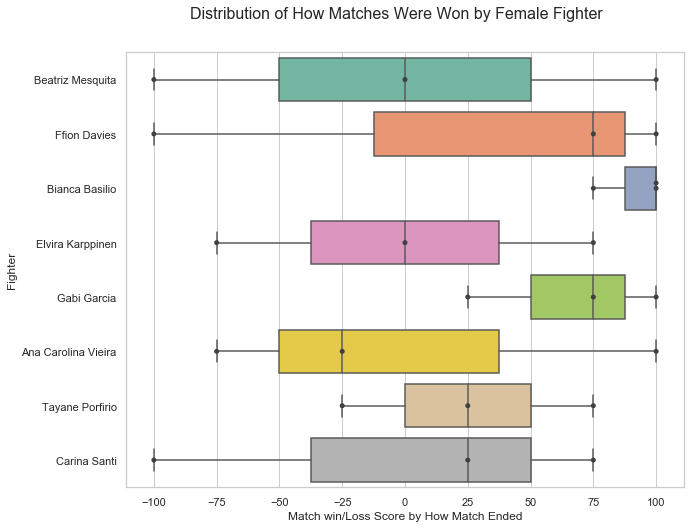

In [405]:
# fighter by score - Final_W-L_Score
fig, ax4 = plt.subplots()
fig.set_size_inches(10,8)
ax4 = sns.boxplot(x="Final_WL_Score", y="Fighter", data=f_list, orient="h", palette="Set2")
ax4 = sns.swarmplot(x="Final_WL_Score", y="Fighter", data=f_list, color=".25",)
fig.suptitle("Distribution of How Matches Were Won by Female Fighter",y=.96,fontsize=16) 
ax4.set_xlabel("Match win/Loss Score by How Match Ended") 
plt.savefig('Score for How Won Females.png',bbox_inches='tight')

In [494]:
df.shape

(226, 45)

In [493]:
df.to_excel('ADCC_match_fighter_all.xlsx')

Heat Maps for Numerical and Categorical Features

In [495]:
#set index as match number and order accordingly
df.set_index('Match No', inplace=True)

In [496]:
df.sort_index()

,Gender,Weight,Championship,Round,Fighter,Points,Result,How,Time,Day,...,Min,Sec,Seconds,KGWeight,How_weighted,How_weighted_2,Result_score,Final_WL_Score,Place_score,Place_num
Match No,,,,,,,,,,,,,,,,,,,,,
1,Male,Men +99kg,Championship,Round of 16,Antonio Braga Neto,0,l,score,10:00,Saturday,...,10,0,10.000000,150,75,2,-1,-75,0,99
1,Male,Men +99kg,Championship,Round of 16,Marcus Buchecha Almeida,2,w,score,10:00,Saturday,...,10,0,10.000000,150,75,2,1,75,0,99
2,Male,Men +99kg,Championship,Round of 16,Victor Hugo,4,w,score,10:00,Saturday,...,10,0,10.000000,150,75,2,1,75,0,99
2,Male,Men +99kg,Championship,Round of 16,Jared Dopp,0,l,score,10:00,Saturday,...,10,0,10.000000,150,75,2,-1,-75,0,99
3,Male,Men +99kg,Championship,Round of 16,Eliot Marshall,0,l,submission,8:07,Saturday,...,8,7,8.116667,150,100,3,-1,-100,0,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Male,Absolute,Championship,Final,Marcus Buchecha Almeida,0,l,score,30,Sunday,...,30,0,30.000000,200,75,2,-1,-75,50,2
112,Male,Absolute,Consolation,Consolation,Mahamed Aly,0,l,submission,7:12,Sunday,...,7,12,7.200000,200,100,3,-1,-100,0,99
112,Male,Absolute,Consolation,Consolation,Lachlan Giles,0,w,submission,7:12,Sunday,...,7,12,7.200000,200,100,3,1,100,25,3


In [530]:
#segment new dfs into categorical only and numeric only features
df_cats_2 = df[['Results', 'Place','Gender','Weight','Round','Fighter','How','Time','Day','Gym','Belt','Entrance',
                'Medal_ADCC','ADCC_place','ADCC_Year','ADCC_years_competed','Trails_winner','Trials_Year',
                'Trails_place']]

df_nums = df[['Result_score','Place_num','Final_WL_Score','Points','How_weighted_2',
              'KGWeight','Seconds','RoundNo','age_float','blackbelt_float','Num_ADCC_comp','Highest_ADCC_place',
             'Max_ADCC_medals','MR_ADCC_Medal_yr','Highest_Trials_place','Max_tr_medals','MR_tr_Medal_yr']]


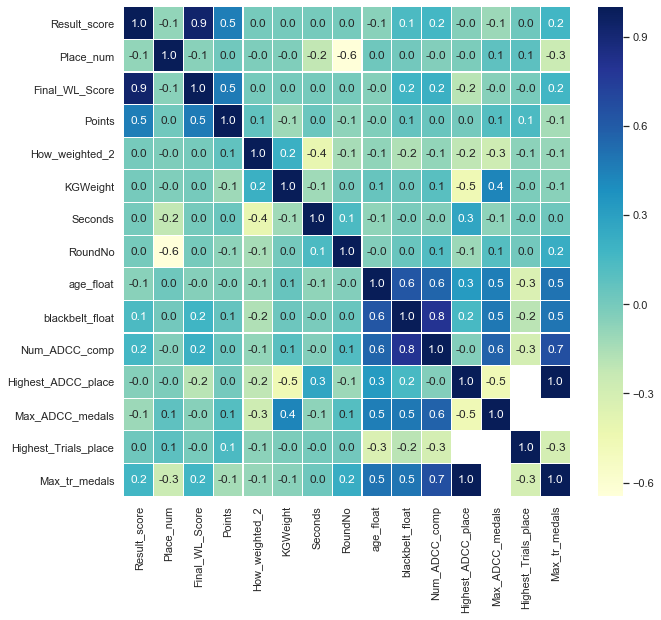

In [529]:
# measure the correlation between the numerical data only
import seaborn as sns
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(10,9))
ax = sns.heatmap(df_nums.corr(),annot=True, linewidths=.1, fmt='.1f', ax=ax,cmap="YlGnBu")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!

plt.show()
f.savefig('Numerical Corr Heat Map 2.png',bbox_inches='tight')

Cramer's V

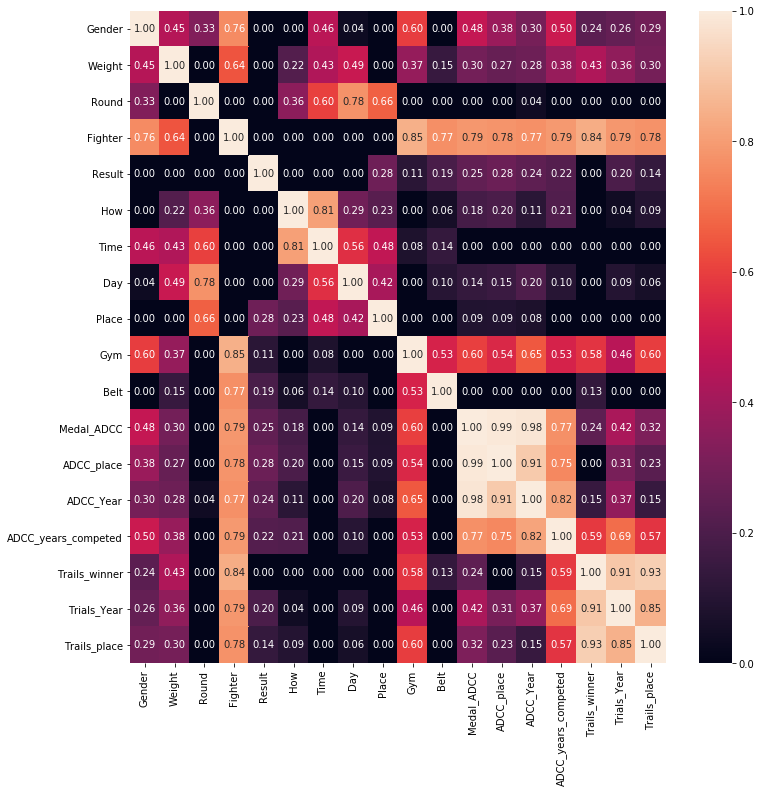

In [134]:
nominal.associations(df_cats, nominal_columns='all', figsize=(12,12))

Theil's U

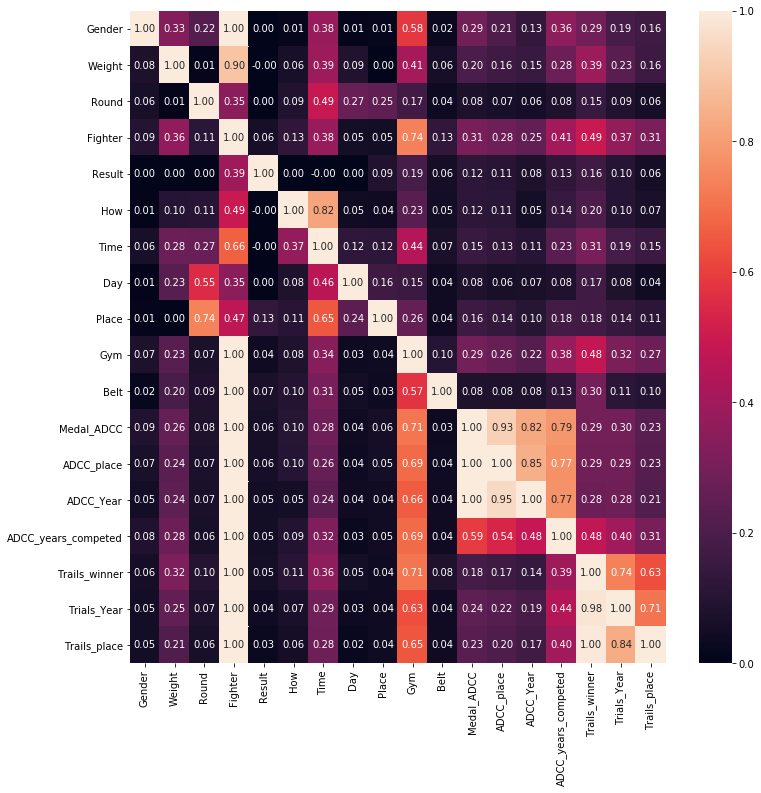

In [129]:
import pandas as pd
from dython import nominal

nominal.associations(df_cats, theil_u=True, nominal_columns='all', figsize=(12,12))
# f2.savefig('Categorical Corr Heat Map.png')

<font color=  #3498db >

#### Additional Exploratory Data Analysis

In [118]:
df2 = pd.read_excel('fighter_trends.xlsx')
df2 = df2.T
df2.columns = df2.iloc[0]
df2 = df2.drop('Name')
df2.reset_index(inplace=True)

In [110]:
df3 = pd.read_excel('fighter_trends_weight.xlsx')
df3 = df3.T
df3.columns = df3.iloc[0]
df3 = df3.drop('Name')
# df3.reset_index(inplace=True)
df3.fillna(0, inplace=True)

Line plots for fighter experience

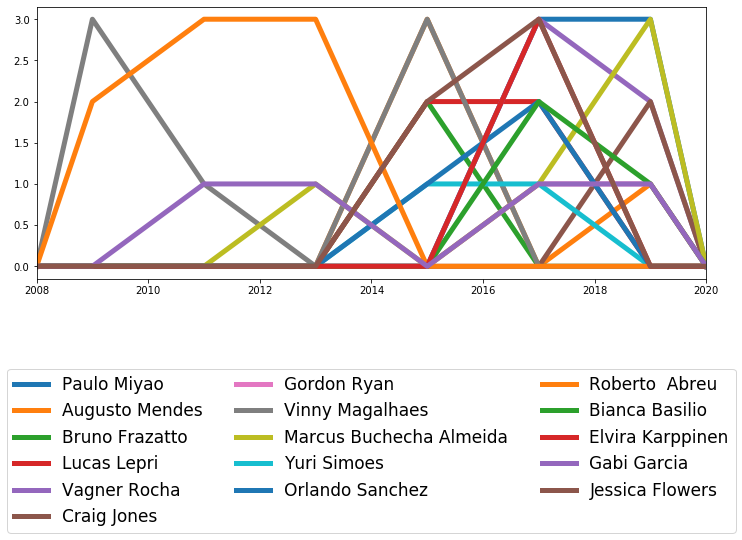

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
lines = df3.plot.line(figsize=(12,5),linewidth=5) #linewidth=5
leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -.3), ncol=3,fontsize=17,)

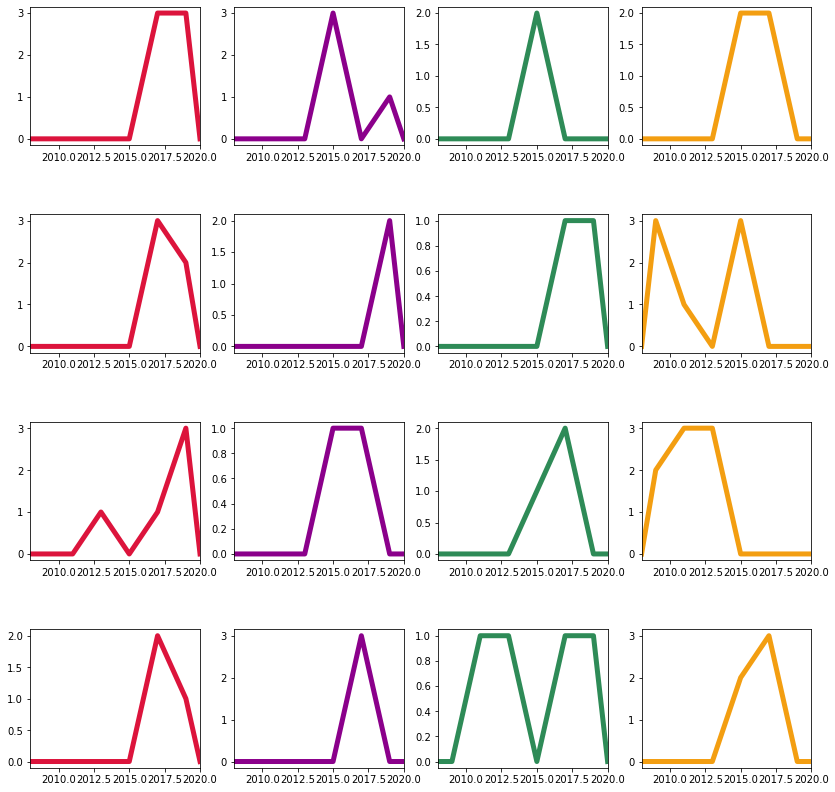

In [152]:
f,ax=plt.subplots(nrows=4, ncols=4,figsize=(14,14))
f.subplots_adjust(hspace=.5)
df3['Paulo Miyao'].plot.line(ax=ax[0,0],color='crimson', linewidth=5)
# ax[0,0].set_title('Previous\nADCC Experience')
df3['Augusto Mendes'].plot.line(ax=ax[0,1],color='darkmagenta', linewidth=5)
# ax[0,1].set_title('Previous\nTrials Experience')
df3['Bruno Frazatto'].plot.line(ax=ax[0,2],color='seagreen', linewidth=5)
# ax[0,2].set_title('Number of\nTrials Medals')
df3['Lucas Lepri'].plot.line(ax=ax[0,3],color='#f39e11', linewidth=5)

df3['Vagner Rocha'].plot.line(ax=ax[1,0],color='crimson', linewidth=5)
# ax[1,0].set_title('Previous\nADCC Placement')
df3['Craig Jones'].plot.line(ax=ax[1,1],color='darkmagenta', linewidth=5)
# ax[1,1].set_title('Number of\nADCC Medals')
df3['Gordon Ryan'].plot.line(ax=ax[1,2],color='seagreen', linewidth=5)

df3['Vinny Magalhaes'].plot.line(ax=ax[1,3],color='#f39e11', linewidth=5)

df3['Marcus Buchecha Almeida'].plot.line(ax=ax[2,0],color='crimson', linewidth=5)
# ax[1,0].set_title('Previous\nADCC Placement')
df3['Yuri Simoes'].plot.line(ax=ax[2,1],color='darkmagenta', linewidth=5)
# ax[1,1].set_title('Number of\nADCC Medals')
df3['Orlando Sanchez'].plot.line(ax=ax[2,2],color='seagreen', linewidth=5)

df3['Roberto  Abreu'].plot.line(ax=ax[2,3],color='#f39e11', linewidth=5)

df3['Bianca Basilio'].plot.line(ax=ax[3,0],color='crimson', linewidth=5)
# ax[1,0].set_title('Previous\nADCC Placement')
df3['Elvira Karppinen'].plot.line(ax=ax[3,1],color='darkmagenta', linewidth=5)
# ax[1,1].set_title('Number of\nADCC Medals')
df3['Gabi Garcia'].plot.line(ax=ax[3,2],color='seagreen', linewidth=5)

df3['Jessica Flowers'].plot.line(ax=ax[3,3],color='#f39e11', linewidth=5)

# ax[1,2].remove()
plt.show()
# f.savefig('ADCC Experience Plots by W-L-Updated 2.png')

In [114]:
df4 = pd.read_excel('fighter_trends_absolute.xlsx')
df4 = df4.T
df4.columns = df4.iloc[0]
df4 = df4.drop('Name')
# df4.reset_index(inplace=True)
df4.fillna(0, inplace=True)

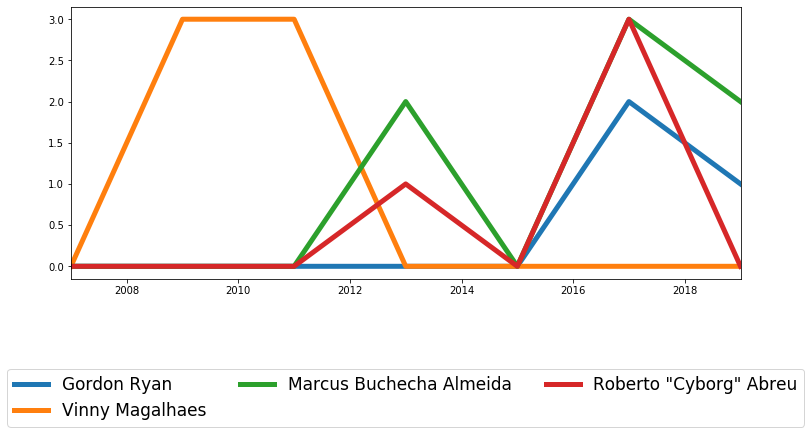

In [113]:
lines = df4.plot.line(figsize=(12,5),linewidth=5) 
leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -.3), ncol=3,fontsize=17,)

In [115]:
df5 = pd.read_excel('fighter_trends_trials.xlsx')
df5 = df5.T
df5.columns = df5.iloc[0]
df5 = df5.drop('Name')
# df5.reset_index(inplace=True)
df5.fillna(0, inplace=True)

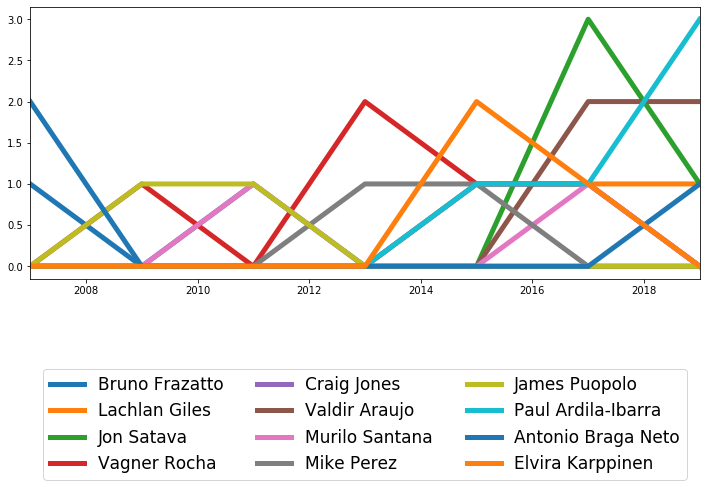

In [116]:
lines = df5.plot.line(figsize=(12,5),linewidth=5) 
leg = plt.legend(loc=9, bbox_to_anchor=(0.5, -.3), ncol=3,fontsize=17,)

Scatterplots for correlation on fighter features

In [121]:
s = {'w': 'Win', 'l': 'Loss'}
df['Result'] = df['Result'].map(s)

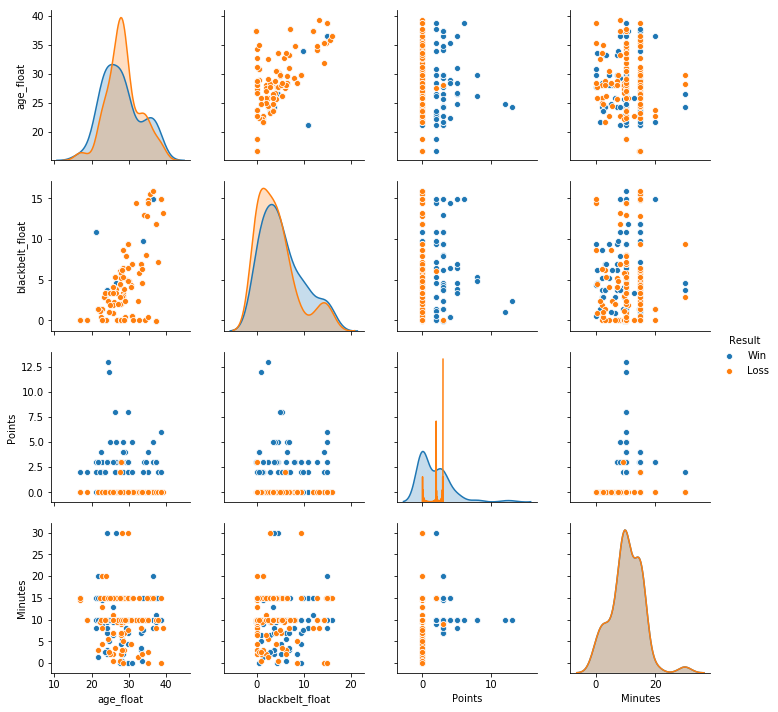

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(df[['age_float','blackbelt_float','Points','Minutes','Result']],hue='Result')
g.savefig('Age Exp Points Minuted by W-L.png')

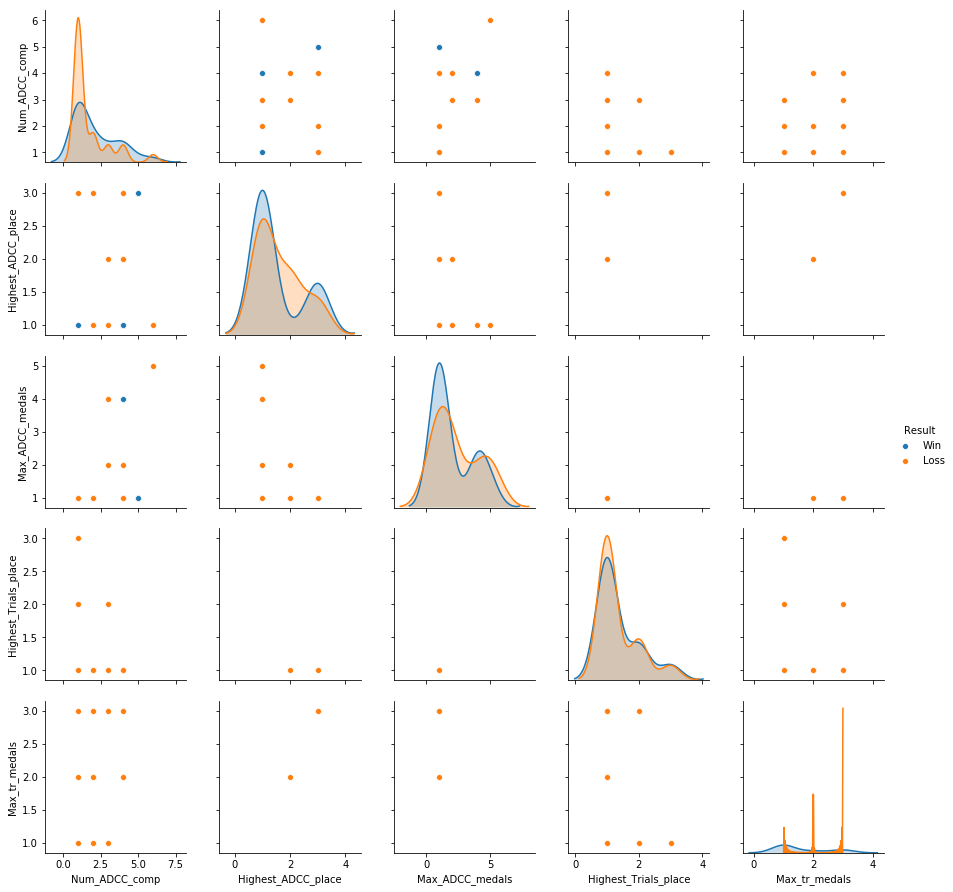

In [51]:
# Single line to create pairplot
f = sns.pairplot(df[['Num_ADCC_comp','Highest_ADCC_place','Max_ADCC_medals','Highest_Trials_place','Max_tr_medals','Result']],hue='Result')
f.savefig('ADCC N Trials Exp by W-L.png')

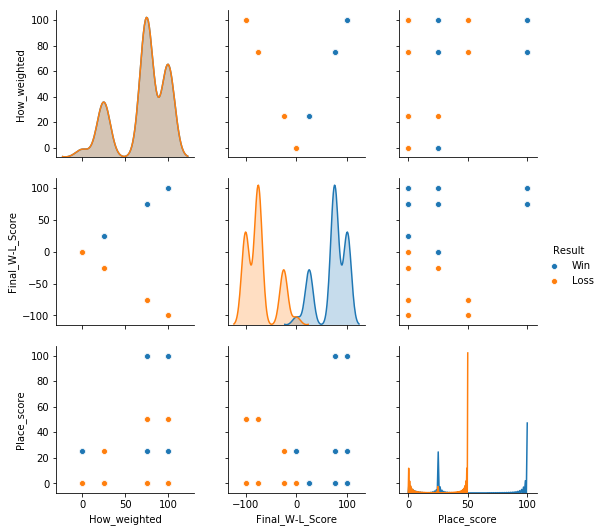

In [52]:
# Single line to create pairplot
r = sns.pairplot(df[['How_weighted','Final_W-L_Score','Place_score','Result']],hue='Result')
r.savefig('How Place Final Score by W-L.png')

Density plots on fighter experience

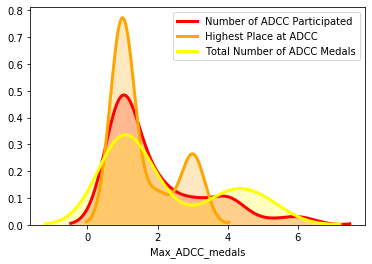

In [144]:
sns.distplot( df["Num_ADCC_comp"] , color="red", label="Number of ADCC Participated",hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot( df["Highest_ADCC_place"] , color="orange", label="Highest Place at ADCC",hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot( df["Max_ADCC_medals"] , color="yellow", label="Total Number of ADCC Medals",hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})

# r.savefig('How Place Final Score by W-L.png')

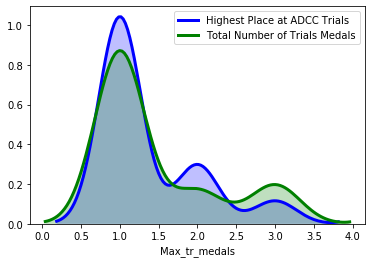

In [143]:
sns.distplot( df["Highest_Trials_place"] , color="blue", label="Highest Place at ADCC Trials",hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot( df["Max_tr_medals"] , color="green", label="Total Number of Trials Medals",hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})

Aggregate Counts

In [245]:
outcomes = df.groupby('Day').agg({'Round': 'nunique', 'How_weighted': 'nunique', 'Fighter':'nunique','Minutes':'nunique'})
outcomes.columns = ["RoundCount","ResultCount","FighterCount","MinuteCount"]
outcomes

,RoundCount,ResultCount,FighterCount,MinuteCount
Day,,,,
Saturday,2,3,96,12
Sunday,5,4,39,18


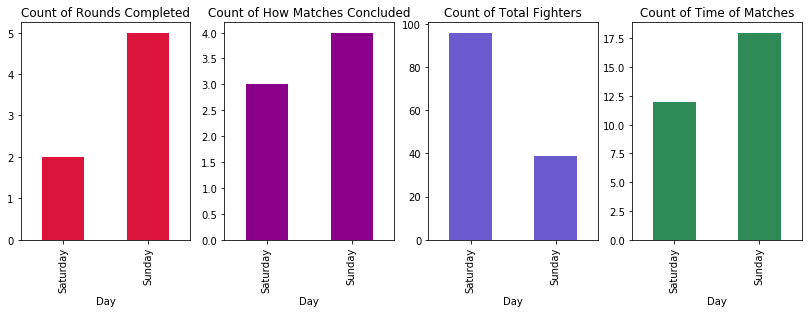

In [246]:
f,ax=plt.subplots(1,4,figsize=(14,4))
outcomes["RoundCount"].plot(ax=ax[0],color='crimson', kind='bar')
ax[0].set_title('Count of Rounds Completed')
outcomes["ResultCount"].plot(ax=ax[1],color='darkmagenta', kind='bar')
ax[1].set_title('Count of How Matches Concluded')
outcomes["FighterCount"].plot(ax=ax[2],color='slateblue', kind='bar')
ax[2].set_title('Count of Total Fighters')
outcomes["MinuteCount"].plot(ax=ax[3],color='seagreen', kind='bar')
ax[3].set_title('Count of Time of Matches')
plt.show()
f.savefig('Counts by Day-Rounds Matches FIghters Time.png')

In [43]:
outcomes1 = df.groupby('Result').agg({'Num_ADCC_comp': 'nunique', 
                                      'Highest_Trials_place':'nunique','Max_tr_medals':'nunique',
                                     'Highest_ADCC_place':'nunique','Max_ADCC_medals':'nunique'})
outcomes1.columns = ["NumADCCCount", "TrialsPlaceCount","TrialsMedalCount",
                    "ADCCPlaceCount","ADCCMedalCount"]
outcomes1

,NumADCCCount,TrialsPlaceCount,TrialsMedalCount,ADCCPlaceCount,ADCCMedalCount
Result,,,,,
Loss,5,3,3,3,4
Win,6,3,3,3,4


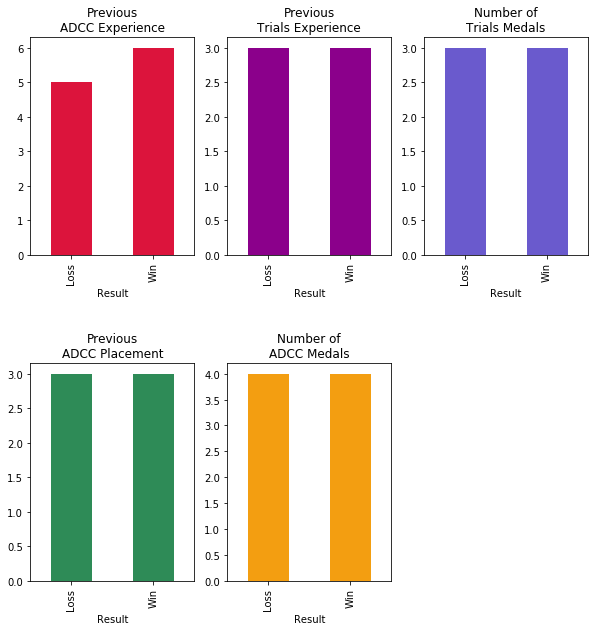

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(nrows=2, ncols=3,figsize=(10,10))
f.subplots_adjust(hspace=.5)
outcomes1["NumADCCCount"].plot(ax=ax[0,0],color='crimson', kind='bar')
ax[0,0].set_title('Previous\nADCC Experience')
outcomes1["TrialsPlaceCount"].plot(ax=ax[0,1],color='darkmagenta', kind='bar')
ax[0,1].set_title('Previous\nTrials Experience')
outcomes1["TrialsMedalCount"].plot(ax=ax[0,2],color='slateblue', kind='bar')
ax[0,2].set_title('Number of\nTrials Medals')
outcomes1["ADCCPlaceCount"].plot(ax=ax[1,0],color='seagreen', kind='bar')
ax[1,0].set_title('Previous\nADCC Placement')
outcomes1["ADCCMedalCount"].plot(ax=ax[1,1],color='#f39e11', kind='bar')
ax[1,1].set_title('Number of\nADCC Medals')
ax[1,2].remove()
plt.show()
f.savefig('ADCC Experience Plots by W-L-Updated 2.png')

In [253]:
outcomes2 = df.groupby('Result').agg({'Points': 'nunique', 'KGWeight':'nunique','age_float':'nunique',
                                     'blackbelt_float':'nunique',})
outcomes2.columns = ["PointsCount", "WeightCount","AgeCount","BlackBeltCount"]
outcomes2

,PointsCount,WeightCount,AgeCount,BlackBeltCount
Result,,,,
Loss,3,6,77,50
Win,9,6,50,38


Catplots for distribution

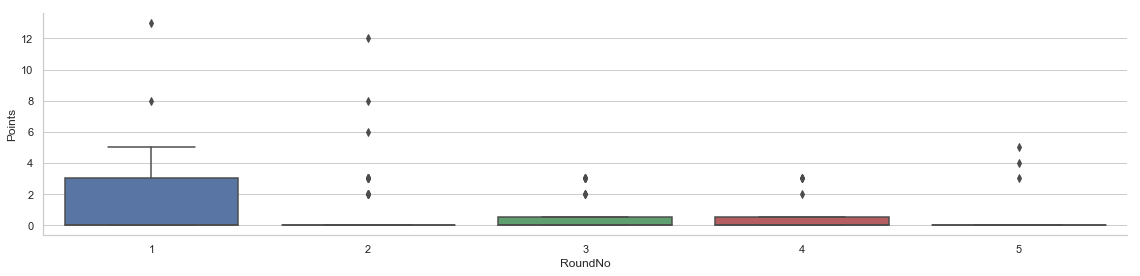

In [386]:
ax2 = sns.catplot(x="RoundNo", y="Points",data=df, kind="box",height=4, aspect=4)

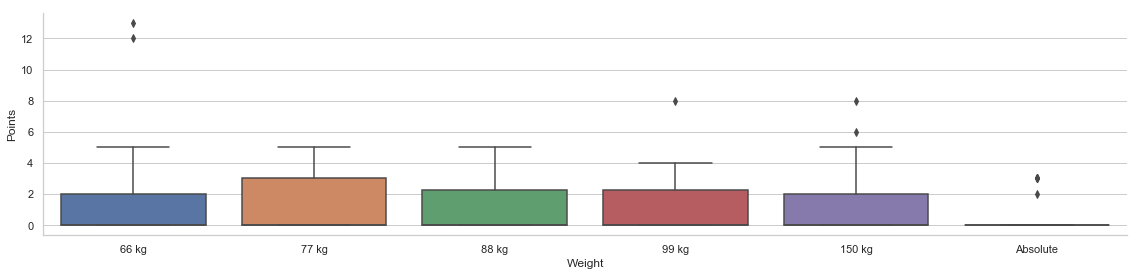

In [387]:
ax2 = sns.catplot(x="Weight", y="Points",data=df, kind="box",height=4, aspect=4)

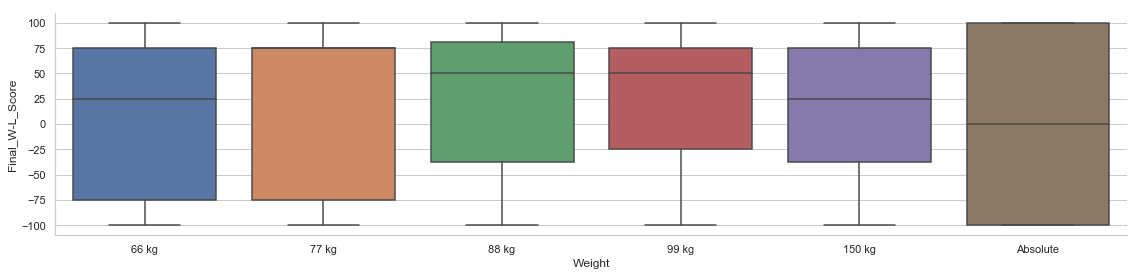

In [390]:
ax2 = sns.catplot(x="Weight", y="Final_W-L_Score",data=df, kind="box",height=4, aspect=4)

Alternative style for scatterplot

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
fig = go.Figure(data=go.Scattergl
(
    x = df["Points"], 
    y = df["Minutes"],
    mode='markers',
    text = df['Fighter'],
    marker=dict(line_width=0.4),
    marker_color='rgb(0,145,119)'
))

fig.update_layout(title='Points to Minutes Correlation', height=600, width=800)
fig.update_xaxes(title_text="Points")
fig.update_yaxes(title_text="Minutes")

fig.show()